# Housing Assignment 

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in CSV file.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.
 
### Business Goal 
 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### 1. Importing the Necessary Libraries

In [1]:
#Importing the necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import sklearn
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#### 1.1 Data Reading and Understanding

We will import the file and get glance at it.

In [2]:
#importing the csv file

df = pd.read_csv("train.csv")  
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#get Shape and info of dataframe
print("\nThe Shape of dataframe is :",df.shape)
print("\n--------------------------------------")
df.info()


The Shape of dataframe is : (1460, 81)

--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1

In [4]:
# get describe

df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
#view columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 1.2 Cleaning

- We will identify Null Values and try to impute with most appropriate statistics. 
- We will drop columns have more than 90% of Null Values

In [6]:
# Checking null values percentages
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [7]:
# Exploring value counts of missing value counts gtr than 80%
print("Value Counts of Most affected\n-----------------------------")
print(df['PoolQC'].value_counts())
print(df['MiscFeature'].value_counts())
print(df['Alley'].value_counts())
print(df['Fence'].value_counts())          

Value Counts of Most affected
-----------------------------
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [8]:
# Dropping ID & Missings columns above 90%
df.drop(['Id','Alley','PoolQC','MiscFeature'],axis=1,inplace = True)


In [9]:
# Check updated shape and glace at data
print(df.shape)
df.head()

(1460, 77)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Check Null Values in Categorical Column

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [11]:
# Imputing None in above columns

for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence',  'Electrical'):
    
    df[col]=df[col].fillna('None')

In [12]:
# Check Null Values in Numerical Column

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
#Filling with median value

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median()) 
df['LotFrontage'].isnull().sum()

0

In [14]:
#Filling with median value

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median()) 
df['MasVnrArea'].isnull().sum()

0

In [15]:
#Get Value counts of GarageYrBlt column

df['GarageYrBlt'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64>

In [16]:
#Filling GarageYrBlt with 0.0 as this column was float and contains Year as value

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].fillna(0.0))
df['GarageYrBlt'].isnull().sum()

0

In [17]:
#Get info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
#Date Coversion into int format

df['YearBuilt'] = df['YearBuilt'].astype("int64")
df['GarageYrBlt'] =df['GarageYrBlt'].astype("int64")
df['YrSold'] =df['YrSold'].astype("int64")
df['YearRemodAdd'] = df['YearRemodAdd'].astype("int64")

In [19]:
#Get House Model age

def house_remodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['Remodelled'] = df.apply(house_remodel, axis=1)
df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000,0


In [20]:
# Get property age

def getpropertyage(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getpropertyage, axis=1)
df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500,1,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000,1,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000,0,8


In [21]:
#Garage is filtered based on constructed year 

def garage_construct(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(garage_construct)
df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500,0,5,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500,0,31,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500,1,6,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000,0,8,1


In [22]:
#Dropping year 

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

### 1.3 Data Categorization and Correlation

- Categorize data on basis Numerical and Categorical 
- View correlation of numerical data

In [23]:
#Categorizing on basis of datatype 'Int & Float'

num_col = list(df.select_dtypes(include=['int64','float']).columns)
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'Remodelled',
 'BuiltOrRemodelAge',
 'OldOrNewGarage']

In [24]:
#Categorizing on basis of datatype 'object'
cat_col = list(df.select_dtypes(include=('object')).columns)
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

<AxesSubplot:>

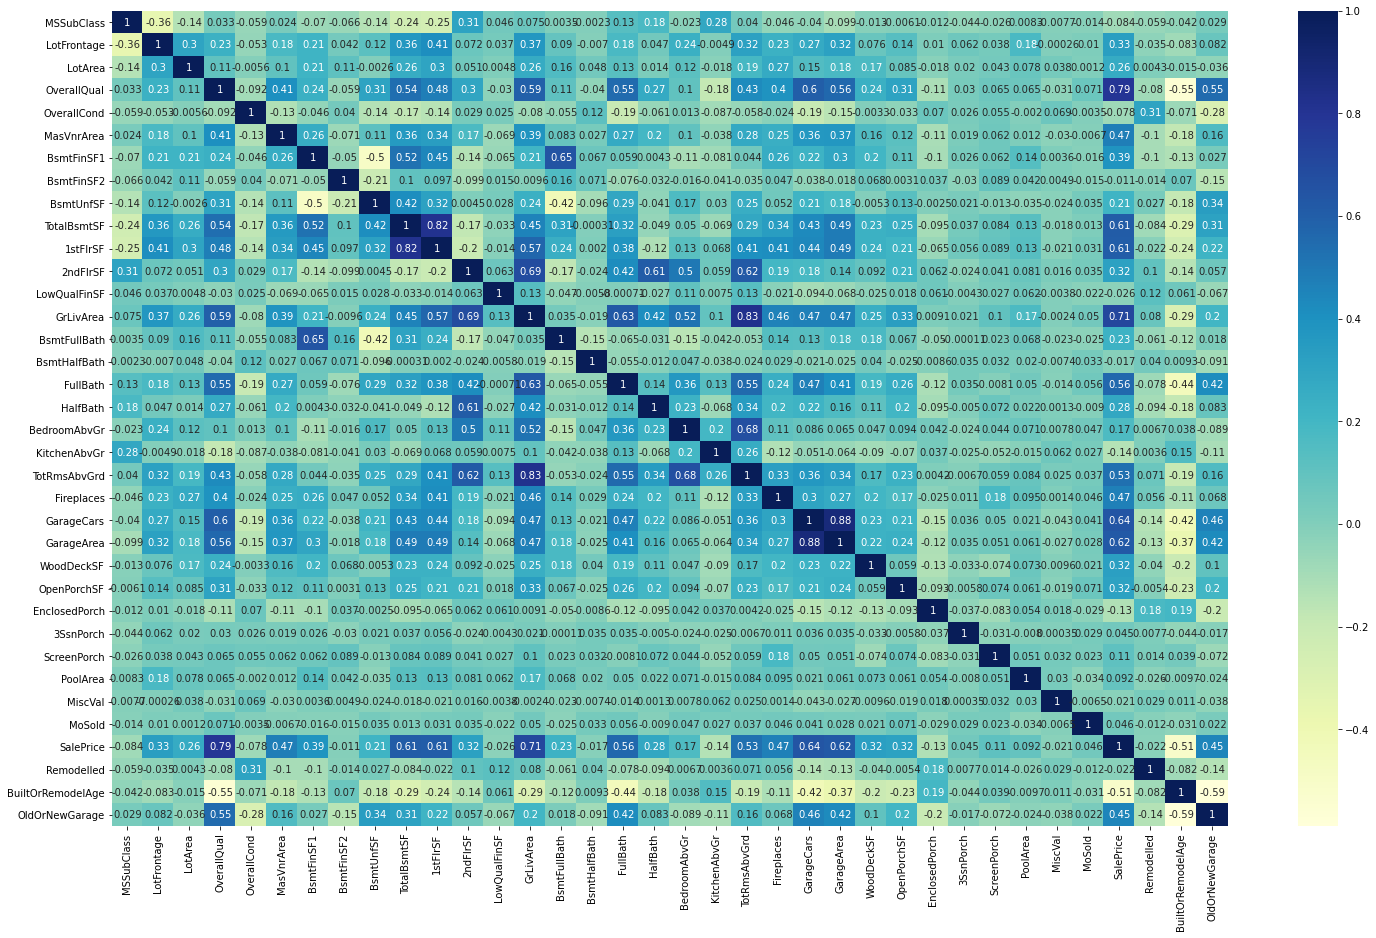

In [25]:
#Getting the Correlation Matrix

df_corr1=df.corr()
plt.figure(figsize=[25,15])
sns.heatmap(df_corr1,cmap="YlGnBu",annot=True)

### Based on Correlation Matrix we can derive.

We can see that SalePrice is highly correlated with following columns
- OverallQual  
- GrLivArea
- Fireplaces
- FullBath
- 1stFirSF
- 2ndFirSF
- TotalBsmntSF
- MasVnrArea
- OldorNewGarage
- WoodDeckSF
- OpenPorchSF



### 1.4 Outlier Treatment

We will identify few key columns and check for outliers

In [26]:
# Looking for Outliers in Correlated columns

<AxesSubplot:xlabel='SalePrice'>

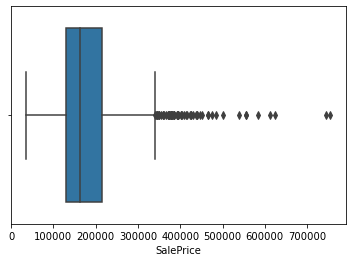

In [27]:
# Plotting SalePrice column

sns.boxplot(df["SalePrice"])

(1355, 76)


<AxesSubplot:xlabel='SalePrice'>

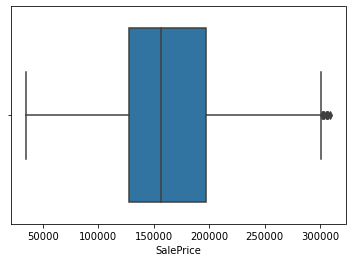

In [28]:
# Dropping values greater than 310000

df = df[df['SalePrice'] < 310000]
print(df.shape)
sns.boxplot(df['SalePrice'])

<AxesSubplot:xlabel='OverallQual'>

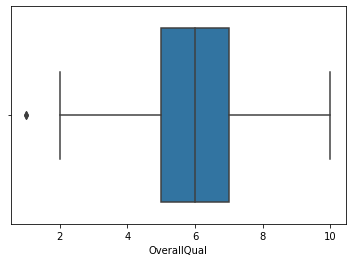

In [29]:
# Plotting OverallQual column

sns.boxplot(df['OverallQual'])


<AxesSubplot:xlabel='GrLivArea'>

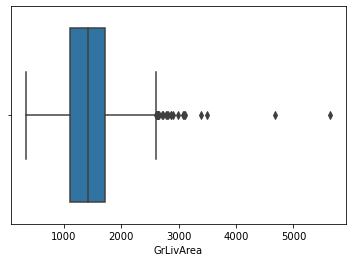

In [30]:
# Plotting GrLivArea column

sns.boxplot(df['GrLivArea'])

(1330, 76)


<AxesSubplot:xlabel='GrLivArea'>

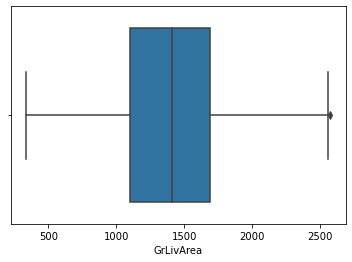

In [31]:
# Dropping values greater than 2600

df = df[df['GrLivArea'] < 2600]
print(df.shape)
sns.boxplot(df['GrLivArea'])

### 1.5 Univariate Analysis

In [32]:
#Defining Function for plotting boxplot for numerical column

def cdf(column,row,axes):
    sns.boxplot(df[column],ax=axes[row,0])
    sns.distplot(df[column],ax=axes[row,1])

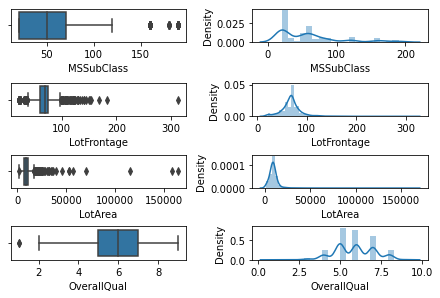

In [33]:
# Plotting Numerical columns

fig, axes = plt.subplots(4,2,constrained_layout = True)
for i in range(4):
    cdf(num_col[i],i,axes)

(1329, 76)


<AxesSubplot:xlabel='LotFrontage'>

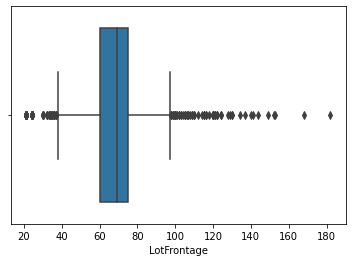

In [34]:
#Since we know LotFrontage has significant correlation with Sale price, we remove outliers from LotFrontage

df = df[df['LotFrontage'] < 200]
print(df.shape)
sns.boxplot(df['LotFrontage'])

(1284, 76)


<AxesSubplot:xlabel='LotArea'>

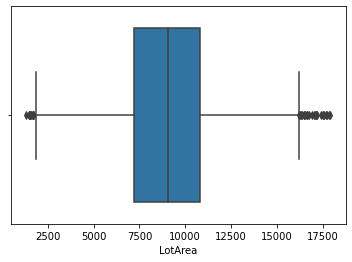

In [35]:
# Dropping values greater than 18000

df = df[df['LotArea'] < 18000]
print(df.shape)
sns.boxplot(df['LotArea'])

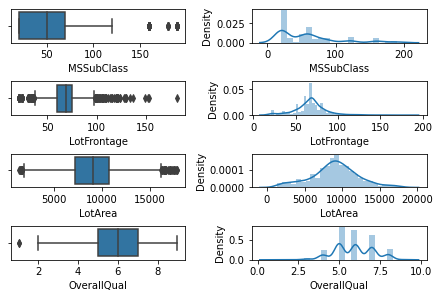

In [36]:
#Rechecking again

fig, axes = plt.subplots(4,2,constrained_layout = True)
for i in range(4):
    cdf(num_col[i],i,axes)

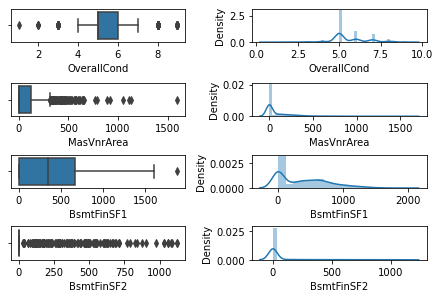

In [37]:
#Plotting next set of Numerical columns

fig, axes = plt.subplots(4, 2,constrained_layout = True)
rows = 0 
for i in range(4,8):
    cdf(num_col[i],rows,axes)
    rows = rows + 1

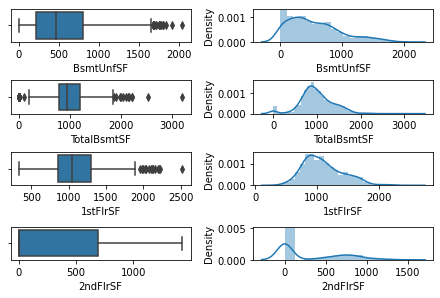

In [38]:
#Plotting next set of Numerical columns

fig, axes = plt.subplots(4, 2,constrained_layout = True)
rows = 0 
for i in range(8,12):
    cdf(num_col[i],rows,axes)
    rows = rows + 1

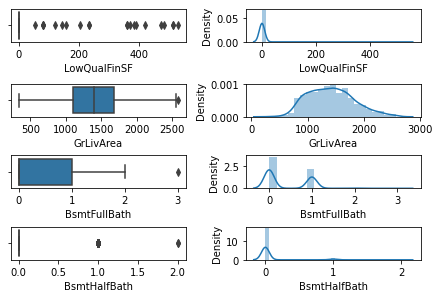

In [39]:
#Plotting next set of Numerical columns

fig, axes = plt.subplots(4, 2,constrained_layout = True)
rows = 0 
for i in range(12,16):
    cdf(num_col[i],rows,axes)
    rows = rows + 1

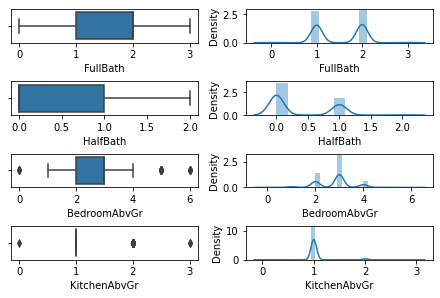

In [40]:
#Plotting next set of Numerical columns

fig, axes = plt.subplots(4, 2,constrained_layout = True)
rows = 0 
for i in range(16,20):
    cdf(num_col[i],rows,axes)
    rows = rows + 1

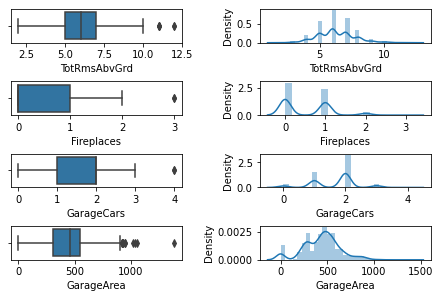

In [41]:
#Plotting next set of Numerical columns

fig, axes = plt.subplots(4, 2,constrained_layout = True)
rows = 0 
for i in range(20,24):
    cdf(num_col[i],rows,axes)
    rows = rows + 1

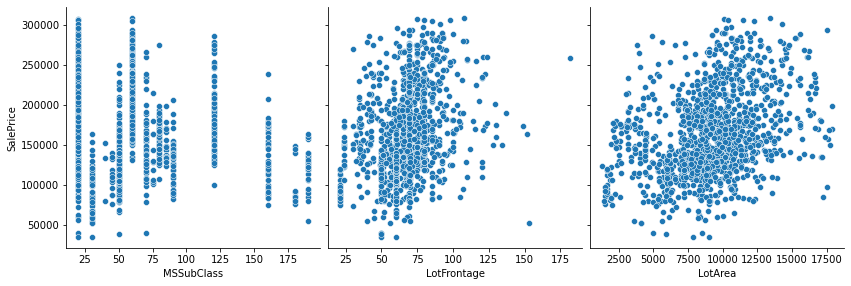

In [42]:
# Check the numerical values using pairplots vs SalePrice


sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

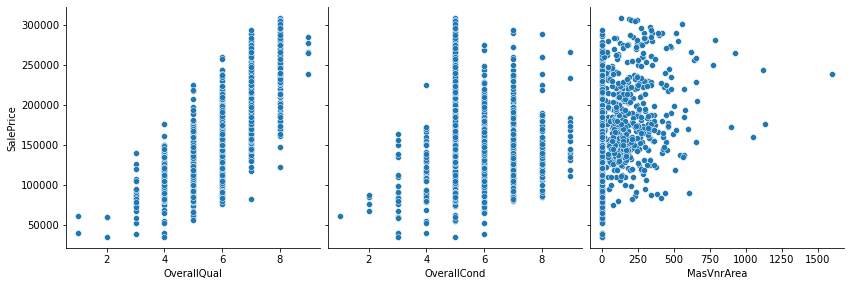

In [43]:
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

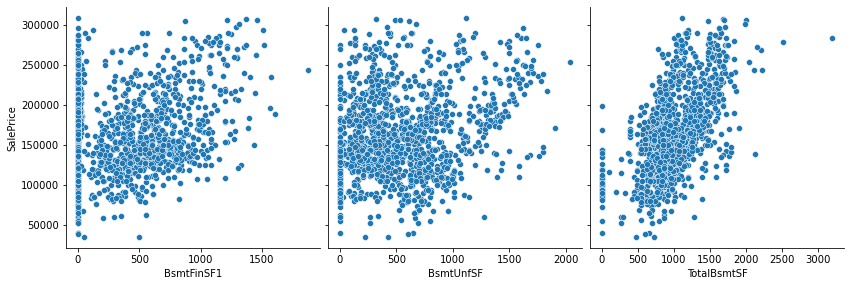

In [44]:
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

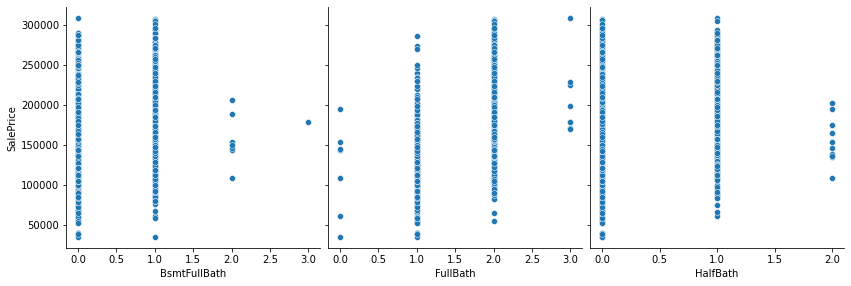

In [45]:
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

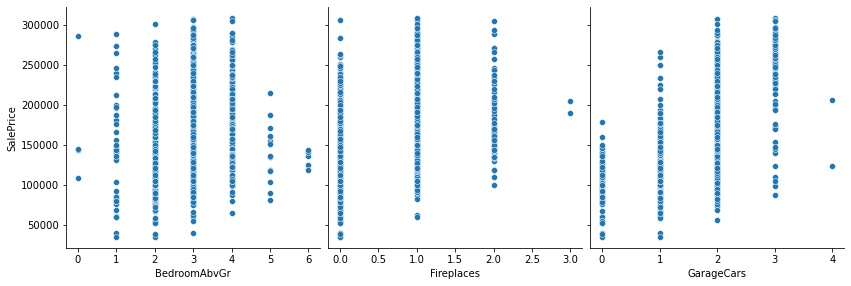

In [46]:
sns.pairplot(df, x_vars=['BedroomAbvGr', 'Fireplaces', 'GarageCars'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

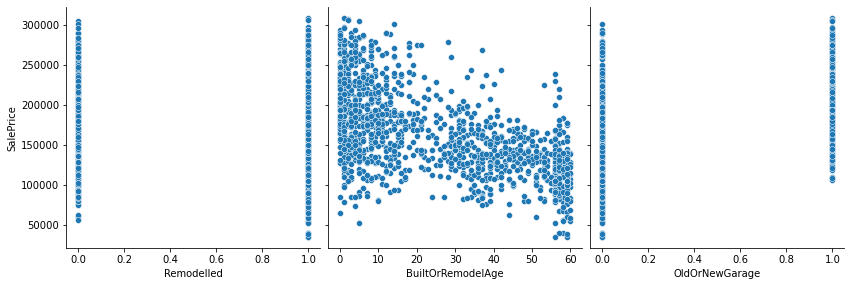

In [47]:
sns.pairplot(df, x_vars=['Remodelled','BuiltOrRemodelAge', 'OldOrNewGarage'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

### Bivariate Analysis

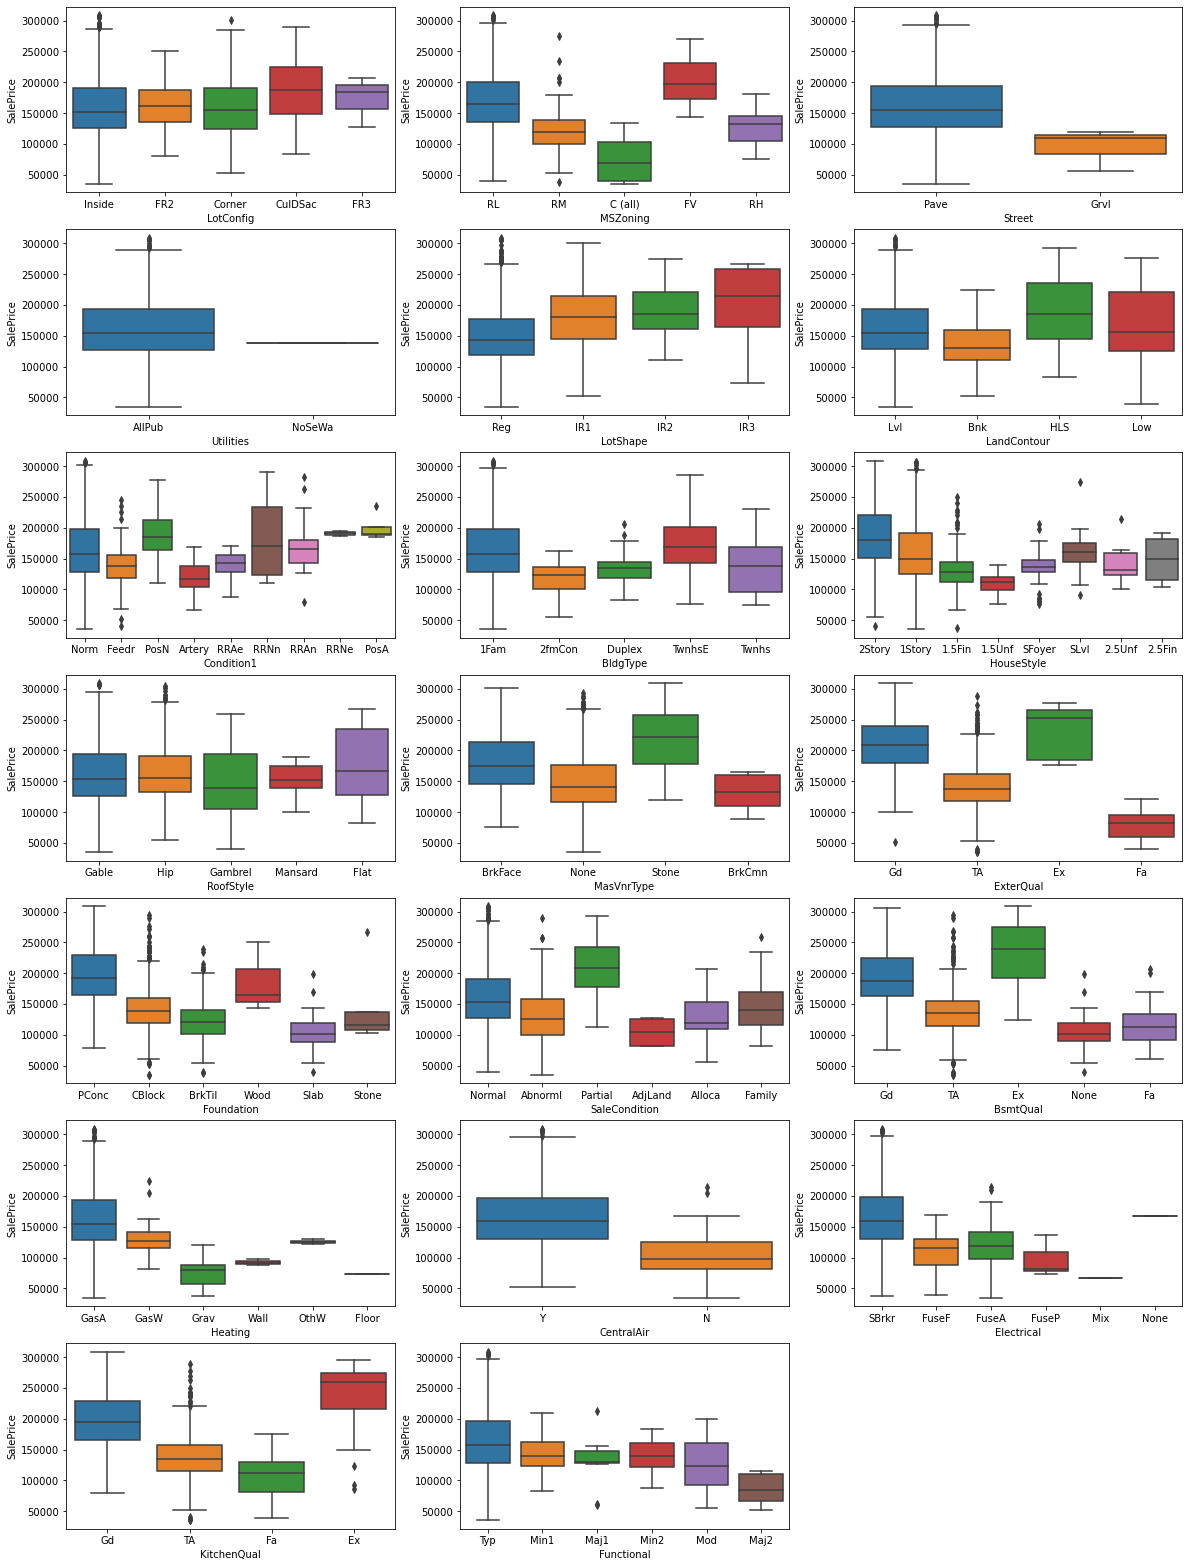

In [48]:
# Plotting box plots for a few categorical variables

plt.figure(figsize=(20, 28))
plt.subplot(7,3,1)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df)
plt.subplot(7,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)
plt.subplot(7,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = df)
plt.subplot(7,3,4)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = df)
plt.subplot(7,3,5)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df)
plt.subplot(7,3,6)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df)
plt.subplot(7,3,7)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df)
plt.subplot(7,3,8)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df)
plt.subplot(7,3,9)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df)
plt.subplot(7,3,10)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df)
plt.subplot(7,3,11)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df)
plt.subplot(7,3,12)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df)
plt.subplot(7,3,13)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df)
plt.subplot(7,3,14)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df)
plt.subplot(7,3,15)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(7,3,16)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = df)
plt.subplot(7,3,17)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = df)
plt.subplot(7,3,18)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = df)
plt.subplot(7,3,19)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df)
plt.subplot(7,3,20)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df)
plt.show()

In [49]:
# Dropping highly collenear columns
df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], axis = 1, inplace = True)


In [50]:
num_col = list(df.select_dtypes(include=['int64','float']).columns)
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'Remodelled',
 'BuiltOrRemodelAge',
 'OldOrNewGarage']

### 1.6 Data Preparation

In [51]:
# View Category
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [52]:
# Creating dummy variables for all categorical columns

cat_col_dum = pd.get_dummies(df[cat_col], drop_first=True)
cat_col_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [53]:
# Drop the original categorical columns
df = df.drop(cat_col, axis=1)

In [54]:
# concatenate the original dataframe with the newly created categorical dummy variables dataframe

df1 = pd.concat([df, cat_col_dum], axis=1)
df1.shape

(1284, 238)

In [55]:
#View of new dataset

df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Remodelled,BuiltOrRemodelAge,OldOrNewGarage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,0,5,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,

### Splitting the data 

In [56]:
# Split Train Test

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size=0.7, test_size=0.3, random_state=88)

print(df_train.shape)
print(df_test.shape)

(898, 238)
(386, 238)


In [57]:
# create MinMaxScaler object

scaler = MinMaxScaler()

In [58]:
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [59]:
X_train = df_train
X_test = df_test

print(X_train.shape)
print(X_test.shape)

(898, 238)
(386, 238)


In [60]:
#Popping out Sale price from Y 
y_train = df_train.pop('SalePrice')
y_test = df_test.pop('SalePrice')

print(y_train.shape)
print(y_test.shape)

(898,)
(386,)


In [61]:
#Get head of X_train

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Remodelled,BuiltOrRemodelAge,OldOrNewGarage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
340,0.235294,0.397516,0.775632,0.875,0.500,0.000000,0.300913,0.641205,0.0,0.702679,0.0,0.0,0.666667,0.5,0.666667,0.333333,0.7,0.0,0.50,0.420488,0.183424,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.272727,0.0,0.133333,1.0,0,0,1,0,1,0,0,

In [62]:
#Describe the dataset

df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Remodelled,BuiltOrRemodelAge,OldOrNewGarage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.00

### Linear Regression 

In [63]:
# Linear Regression model using SKLearn library

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
# running RFE with top 35 features

rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 48),
 ('LotFrontage', False, 134),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 41),
 ('MasVnrArea', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 19),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 68),
 ('BsmtHalfBath', False, 203),
 ('FullBath', False, 109),
 ('HalfBath', False, 110),
 ('BedroomAbvGr', False, 209),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 170),
 ('Fireplaces', False, 6),
 ('GarageCars', False, 17),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 65),
 ('OpenPorchSF', False, 44),
 ('EnclosedPorch', False, 195),
 ('3SsnPorch', False, 84),
 ('ScreenPorch', False, 66),
 ('PoolArea', False, 91),
 ('MiscVal', False, 64),
 ('MoSold', False, 165),
 ('Remodelled', False, 187),
 ('BuiltOrRemodelAge', True, 1),
 ('OldOrNewGarage', False, 73),
 ('MSZoning_FV', False, 13),
 ('MSZoning_RH', False, 15),
 ('MSZoning_RL', False, 14),
 ('MSZoning_RM', False, 16),
 ('Street_Pave', 

In [66]:
# checking top 25 columns from RFE

rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['LotArea', 'OverallQual', 'MasVnrArea', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'BuiltOrRemodelAge',
       'Street_Pave', 'Utilities_NoSeWa', 'LotConfig_FR3', 'Condition1_RRAe',
       'Condition1_RRNn', 'Exterior1st_BrkComm', 'Exterior2nd_Stone',
       'Foundation_Wood', 'BsmtExposure_None', 'BsmtFinType1_None',
       'BsmtFinType2_None', 'Heating_Wall', 'HeatingQC_Po', 'Functional_Maj2',
       'Functional_Typ', 'SaleType_ConLI'],
      dtype='object')

In [67]:
#Columns left by RFE support

X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'OverallCond', '2ndFlrSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=212)

In [68]:
# Creating X_train dataframe 

X_train_lm = X_train[rfe_col]

In [69]:
# Adding constant to the training data

X_train_rfe = sm.add_constant(X_train_lm)

In [70]:
# Running the linear model

lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [71]:
#summary of linear model

print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:37:49   Log-Likelihood:                 1095.7
No. Observations:                 898   AIC:                            -2139.
Df Residuals:                     872   BIC:                            -2015.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1614    

### 

In [72]:
#check VIF of RFE Model
def vif_check(X):    
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

vif_check(X_train_lm)

,Features,VIF
9,Street_Pave,61.29
18,BsmtFinType1_None,51.82
1,OverallQual,37.85
19,BsmtFinType2_None,26.25
17,BsmtExposure_None,26.22
6,KitchenAbvGr,24.60
23,Functional_Typ,17.63
5,GrLivArea,15.73
3,1stFlrSF,10.31
7,GarageArea,9.80


In [73]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['Street_Pave'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:37:49   Log-Likelihood:                 1091.3
No. Observations:                 898   AIC:                            -2133.
Df Residuals:                     873   BIC:                            -2013.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0304    

In [74]:
vif_check(X_train_lm)

,Features,VIF
17,BsmtFinType1_None,51.78
1,OverallQual,28.67
18,BsmtFinType2_None,26.24
16,BsmtExposure_None,26.22
6,KitchenAbvGr,17.47
22,Functional_Typ,15.72
5,GrLivArea,15.64
3,1stFlrSF,10.29
7,GarageArea,9.78
0,LotArea,9.05


In [75]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['BsmtFinType1_None'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     223.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:37:49   Log-Likelihood:                 1091.1
No. Observations:                 898   AIC:                            -2134.
Df Residuals:                     874   BIC:                            -2019.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0308    

In [76]:
vif_check(X_train_lm)

,Features,VIF
1,OverallQual,28.63
6,KitchenAbvGr,17.45
21,Functional_Typ,15.72
5,GrLivArea,15.63
16,BsmtExposure_None,13.44
17,BsmtFinType2_None,13.42
3,1stFlrSF,10.29
7,GarageArea,9.78
0,LotArea,9.04
8,BuiltOrRemodelAge,2.83


In [77]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['OverallQual'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.12e-301
Time:                        23:37:50   Log-Likelihood:                 980.94
No. Observations:                 898   AIC:                            -1916.
Df Residuals:                     875   BIC:                            -1805.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1463    

In [78]:
vif_check(X_train_lm)

,Features,VIF
5,KitchenAbvGr,17.39
15,BsmtExposure_None,13.44
16,BsmtFinType2_None,13.41
4,GrLivArea,12.56
20,Functional_Typ,10.76
2,1stFlrSF,9.85
0,LotArea,9.01
6,GarageArea,8.84
7,BuiltOrRemodelAge,2.72
1,MasVnrArea,1.47


In [79]:
# dropping the KitchenAbvGr from the X_train_lm
X_train_lm.drop(['KitchenAbvGr'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     154.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.97e-277
Time:                        23:37:50   Log-Likelihood:                 919.56
No. Observations:                 898   AIC:                            -1795.
Df Residuals:                     876   BIC:                            -1690.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0247    

In [80]:
vif_check(X_train_lm)

,Features,VIF
14,BsmtExposure_None,13.42
15,BsmtFinType2_None,13.41
4,GrLivArea,10.78
2,1stFlrSF,9.42
0,LotArea,9.00
5,GarageArea,8.83
19,Functional_Typ,7.66
6,BuiltOrRemodelAge,2.35
1,MasVnrArea,1.44
10,Condition1_RRNn,1.34


In [81]:
# dropping the BsmtExposure_None from the X_train_lm
X_train_lm.drop(['BsmtExposure_None'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     161.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.64e-277
Time:                        23:37:50   Log-Likelihood:                 916.98
No. Observations:                 898   AIC:                            -1792.
Df Residuals:                     877   BIC:                            -1691.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0237    

In [82]:
vif_check(X_train_lm)

,Features,VIF
4,GrLivArea,10.76
2,1stFlrSF,9.40
0,LotArea,8.97
5,GarageArea,8.80
18,Functional_Typ,7.66
6,BuiltOrRemodelAge,2.35
1,MasVnrArea,1.44
8,LotConfig_FR3,1.34
10,Condition1_RRNn,1.34
9,Condition1_RRAe,1.19


In [83]:
# dropping the 1stFlrSF from the X_train_lm
X_train_lm.drop(['1stFlrSF'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.18e-258
Time:                        23:37:50   Log-Likelihood:                 870.94
No. Observations:                 898   AIC:                            -1702.
Df Residuals:                     878   BIC:                            -1606.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0650    

In [84]:
vif_check(X_train_lm)

,Features,VIF
3,GrLivArea,9.70
0,LotArea,8.18
4,GarageArea,8.05
17,Functional_Typ,7.65
5,BuiltOrRemodelAge,2.35
1,MasVnrArea,1.44
7,LotConfig_FR3,1.34
9,Condition1_RRNn,1.34
8,Condition1_RRAe,1.19
13,BsmtFinType2_None,1.19


In [85]:
# dropping the Functional_Typ from the X_train_lm
X_train_lm.drop(['Functional_Typ'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     147.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.24e-250
Time:                        23:37:50   Log-Likelihood:                 848.74
No. Observations:                 898   AIC:                            -1659.
Df Residuals:                     879   BIC:                            -1568.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1557    

In [86]:
vif_check(X_train_lm)

,Features,VIF
3,GrLivArea,9.21
0,LotArea,7.79
4,GarageArea,7.18
5,BuiltOrRemodelAge,2.06
1,MasVnrArea,1.44
7,LotConfig_FR3,1.34
9,Condition1_RRNn,1.34
8,Condition1_RRAe,1.19
13,BsmtFinType2_None,1.19
15,HeatingQC_Po,1.16


In [87]:
# dropping the LotArea from the X_train_lm
X_train_lm.drop(['LotArea'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)
lm_new = sm.OLS(y_train,X_train_rfe).fit()
print(lm_new.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     142.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.57e-238
Time:                        23:37:50   Log-Likelihood:                 818.13
No. Observations:                 898   AIC:                            -1600.
Df Residuals:                     880   BIC:                            -1514.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1829    

In [88]:
vif_check(X_train_lm)

,Features,VIF
2,GrLivArea,7.20
3,GarageArea,6.28
4,BuiltOrRemodelAge,1.87
0,MasVnrArea,1.43
6,LotConfig_FR3,1.34
8,Condition1_RRNn,1.34
12,BsmtFinType2_None,1.19
7,Condition1_RRAe,1.16
14,HeatingQC_Po,1.15
13,Heating_Wall,1.14


In [89]:
# Predicting the house price of training model from the final linear regression model

y_train_pred = lm_new.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

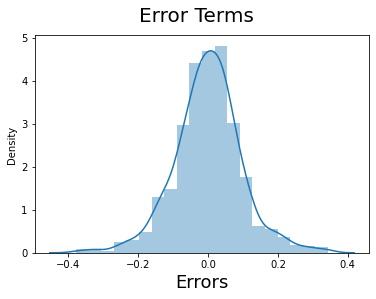

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
# X-label
plt.xlabel('Errors', fontsize = 18)

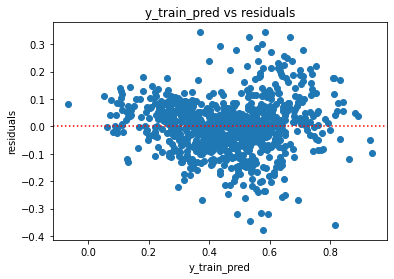

In [91]:
# Plotting scatter plot between y_train_pred and residuals

plt.figure()
y_diff = y_train-y_train_pred
plt.scatter(y_train_pred, y_diff)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('y_train_pred')
plt.ylabel('residuals')
plt.title('y_train_pred vs residuals')
plt.show()

### RIDGE REGRESSION

In [92]:
# list of alphas to tune 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.8}


In [94]:


#Fitting Ridge model for alpha = 2 and printing (first 10) coefficients which have been penalised
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
print(ridge.coef_)


[ 0.19940664 -0.12656321  0.44148329  0.30480375 -0.18618916 -0.04426816
 -0.12097313 -0.07331855  0.04374185 -0.12776922  0.05469122 -0.0715433
 -0.07110753 -0.01267636  0.0282529  -0.15522937 -0.09892783]


In [95]:
r2_score(y_train, ridge.predict(X_train_lm))

0.7317723400360512

In [96]:
print(X_train_rfe.columns)
print(ridge.coef_)


Index(['const', 'MasVnrArea', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'BuiltOrRemodelAge', 'Utilities_NoSeWa', 'LotConfig_FR3',
       'Condition1_RRAe', 'Condition1_RRNn', 'Exterior1st_BrkComm',
       'Exterior2nd_Stone', 'Foundation_Wood', 'BsmtFinType2_None',
       'Heating_Wall', 'HeatingQC_Po', 'Functional_Maj2', 'SaleType_ConLI'],
      dtype='object')
[ 0.19940664 -0.12656321  0.44148329  0.30480375 -0.18618916 -0.04426816
 -0.12097313 -0.07331855  0.04374185 -0.12776922  0.05469122 -0.0715433
 -0.07110753 -0.01267636  0.0282529  -0.15522937 -0.09892783]


Text(0.5, 0, 'Errors')

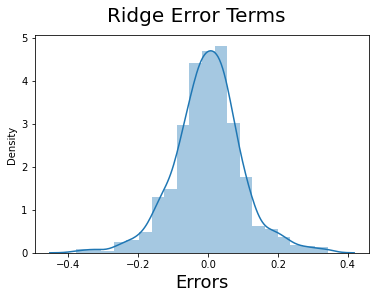

In [97]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Ridge Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)           


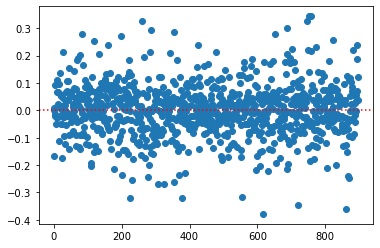

In [98]:
# Looking for patterns in the residuals

plt.scatter(np.arange(0,len(X_train),1), (y_train - y_train_pred))
plt.axhline(y=0, color='r', linestyle=':')
fig.suptitle('Error Patterns', fontsize = 20) 
plt.show()

In [99]:
## If we double the value of alpha

alpha = 1.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
print(ridge.coef_)


[ 0.18960079 -0.11248539  0.43171833  0.30269327 -0.18671074 -0.02935483
 -0.07893235 -0.06622136  0.03092484 -0.0886911   0.04527696 -0.04900871
 -0.06929068 -0.01177532  0.01582944 -0.13417071 -0.07626383]


In [100]:
r2_score(y_train, ridge.predict(X_train_lm))

0.7299157337994706

In [101]:
print(X_train_rfe.columns)
print(ridge.coef_)


Index(['const', 'MasVnrArea', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'BuiltOrRemodelAge', 'Utilities_NoSeWa', 'LotConfig_FR3',
       'Condition1_RRAe', 'Condition1_RRNn', 'Exterior1st_BrkComm',
       'Exterior2nd_Stone', 'Foundation_Wood', 'BsmtFinType2_None',
       'Heating_Wall', 'HeatingQC_Po', 'Functional_Maj2', 'SaleType_ConLI'],
      dtype='object')
[ 0.18960079 -0.11248539  0.43171833  0.30269327 -0.18671074 -0.02935483
 -0.07893235 -0.06622136  0.03092484 -0.0886911   0.04527696 -0.04900871
 -0.06929068 -0.01177532  0.01582944 -0.13417071 -0.07626383]


In [102]:
ridge_final1 = Ridge(alpha=alpha*2,random_state=100)
ridge_final1.fit(X_train_rfe,y_train)
ridge_coef1 = ridge.coef_

### Lasso Regression

In [103]:


lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.0001}


In [105]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [106]:
# Printing coefficients

lasso.coef_[:15]

array([-0.0558387 ,  0.        ,  0.080906  ,  0.17933498,  0.09903984,
        0.04510018,  0.11375037,  0.        , -0.02023206,  0.32045914,
        0.0396209 ,  0.0006746 ,  0.03441894,  0.02327006, -0.0080693 ])

In [107]:
# No. of features considered 
print("Total features fed to the model:", X_train.columns.size)

# No. of features considered 
print("features considered:", np.count_nonzero(lasso.coef_))

# No. of features elimiated
print("features eliminated:", lasso.coef_.size - np.count_nonzero(lasso.coef_))

Total features fed to the model: 237
features considered: 146
features eliminated: 91


Text(0.5, 0, 'Errors')

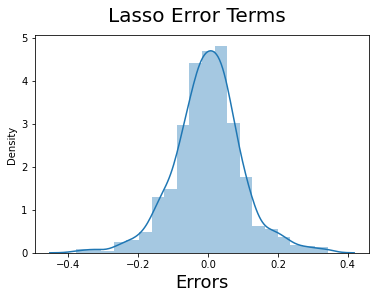

In [108]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Lasso Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)           


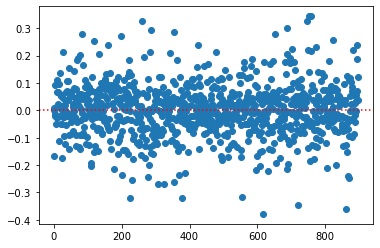

In [109]:
# Looking for patterns in the residuals

plt.scatter(np.arange(0,len(X_train),1), (y_train - y_train_pred))
plt.axhline(y=0, color='r', linestyle=':')
fig.suptitle('Error Patterns', fontsize = 20) 
plt.show()


In [112]:
#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [113]:
# Printing coefficients

lasso.coef_[:15]

array([-0.05375082,  0.        ,  0.07327239,  0.1984987 ,  0.08789676,
        0.03447377,  0.1102637 ,  0.        , -0.01158438,  0.31102537,
        0.03920424,  0.        ,  0.02847614,  0.02025515, -0.        ])

In [110]:
lasso_final1 = Lasso(alpha=alpha*2,random_state=100)
lasso_final1.fit(X_train_rfe,y_train)
lasso_coef1 = lasso_final1.coef_


In [111]:
#Now lets take the coefficients of the lasso regression to explain model

lasso_coef1 = pd.DataFrame(np.atleast_2d(lasso_coef1),columns=X_train_rfe.columns)
lasso_coef1 = lasso_coef1.T
lasso_coef1.rename(columns={0: "Lasso-Coefficient"},inplace=True)
lasso_coef1.sort_values(by=["Lasso-Coefficient"], ascending=False,inplace=True)
lasso_coef1.head(25)

,Lasso-Coefficient
GrLivArea,0.448246
GarageArea,0.306035
MasVnrArea,0.196197
Exterior2nd_Stone,0.007155
const,0.000000
HeatingQC_Po,0.000000
Heating_Wall,-0.000000
Foundation_Wood,-0.000000
Condition1_RRNn,0.000000
LotConfig_FR3,-0.000000


### Conclusion

1. We perfromed Linear Regression with RFE, Ridge Regression and Lasso Regression
2. Lassso Regression provided best results amongst all.